<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    machine learning 10
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
    Classification / SVM
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>
ماشین‌های بردار پشتیبان

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: پس از تکمیل این جلسه، شما قادر خواهید بود

از $learn$-$scikit$ برای استفاده از ماشین بردار پشتیبان جهت طبقه‌بندی استفاده کنید

<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

در این نوت‌بوک، شما از $SVM$ (ماشین‌های بردار پشتیبان) برای ساخت و آموزش یک مدل با استفاده از رکوردهای سلول انسانی استفاده خواهید کرد 

و سلول‌ها را از نظر نمونه‌های خوش‌خیم یا بدخیم طبقه‌بندی می‌کنید

$SVM$ با نقشه‌برداری داده‌ها به یک فضای ویژگی با ابعاد بالا کار می‌کند تا نقاط داده بتوانند دسته‌بندی شوند، حتی زمانی که داده‌ها به طور خطی جداپذیر نباشند

. یک جداکننده بین دسته‌ها پیدا می‌شود، سپس داده‌ها به گونه‌ای تبدیل می‌شوند که جداکننده بتواند به عنوان یک ابرصفحه ترسیم شود

پس از این، ویژگی‌های داده‌های جدید می‌توانند برای پیش‌بینی گروهی که یک رکورد جدید باید به آن تعلق داشته باشد استفاده شوند

**مهم‌ترین تفاوت $SVM$ با مدل‌های طبقه‌بندی رایج مثل درخت تصمیم و لجستیک رگرسیون**

### ۱. **تفاوت در فلسفه و هدف**
- **SVM:**

 به **حاشیه اطمینان** $(Margin)$ فکر می‌کند → چطور دو کلاس را با حداکثر فاصله جدا کنم؟
- **مدل‌های دیگر (مثل لجستیک رگرسیون):**

 به **احتمال** فکر می‌کنند → "چطور احتمال تعلق هر نقطه به یک کلاس را محاسبه کنم؟"

### ۲. **تفاوت در رفتار با داده‌ها**
- **$SVM$:** فقط به "نقاط مرزی" $(Support Vectors)$ توجه می‌کند
- **درخت تصمیم و $KNN$:** به "تمام داده‌ها" توجه می‌کنند

### ۳. **قدرت در فضاهای با ابعاد بالا**
- **$SVM$:** حتی وقتی تعداد ویژگی‌ها از نمونه‌ها بیشتر است، خوب کار می‌کند
- **مدل‌های دیگر:** اغلب با مشکل "ابعاد بالا" روبرو می‌شوند

### ۴. **انعطاف‌پذیری با $Kernel Trick$**
- **$SVM:$** می‌تواند مرزهای غیرخطی پیچیده ایجاد کند
- **لجستیک رگرسیون:** ذاتاً خطی است (مگر با تبدیل‌های دستی)

### ۵. **حساسیت به نویز**
- **$SVM:$** نسبت به نویز مقاوم‌تر است (چون فقط نقاط حاشیه مهم هستند)
- **$KNN:$** بسیار به نویز حساس است

---

**جمع‌بندی بصری:**
- **$SVM:$** مثل "ساخت یک خیابان عریض بین دو محله"
- **لجستیک رگرسیون:** مثل "کشیدن یک خط بین دو محله"  
- **درخت تصمیم:** مثل "پرسیدن سوالات متوالی برای دسته‌بندی"

<h1>فهرست مطالب</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">بارگذاری داده‌های سرطان</a></li>
        <li><a href="#modeling">مدل‌سازی</a></li>
        <li><a href="#evaluation">ارزیابی</a></li>
        <li><a href="#practice">تمرین</a></li>
    </ol>
</div>
<br>
<hr>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<h2 id="load_dataset">بارگذاری داده‌های سرطان</h2>

این مثال بر اساس مجموعه‌داده‌ای است که به صورت عمومی از مخزن یادگیری ماشین $UCI$ در دسترس است $(Asuncion and Newman, 2007)$

[http://mlearn.ics.uci.edu/MLRepository.html]

 این مجموعه‌داده شامل چندصد رکورد نمونه سلول انسانی است که هر کدام حاوی مقادیر مجموعه‌ای از ویژگی‌های سلولی هستند. فیلدهای موجود در هر رکورد عبارت‌اند از

|نام فیلد|توضیحات|
|--- |--- |
|ID|ضخامت توده|
|Clump|ضخامت توده|
|UnifSize|یکنواختی اندازه سلول|
|UnifShape|یکنواختی شکل سلول|
|MargAdh|چسبندگی حاشیه‌ای|
|SingEpiSize|اندازه سلول اپیتلیال تکی|
|BareNuc|هسته‌های لخت|
|BlandChrom|کروماتین یکنواخت|
|NormNucl|هسته‌ک‌های طبیعی|
|Mit|میتوز|
|Class|خوش‌خیم یا بدخیم|


In [2]:
import requests

url = "https://raw.githubusercontent.com/HAKAN-Fatemi/machine-learning-HAKAN/main/file_csv/cell_samples.csv"
response = requests.get(url)

with open("cell_samples.csv", "wb") as f:
    f.write(response.content)

## بارگذاری داده از فایل CSV

In [3]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


فیلد $ID$ شامل شناسه‌های بیماران است. ویژگی‌های نمونه‌های سلولی هر بیمار در فیلدهای $Clump$ تا $Mit$ قرار دارد

مقادیر از 1 تا 10 درجه‌بندی شده‌اند که 1 نشان‌دهنده نزدیک‌ترین حالت به خوش‌خیمی است

فیلد $Class$ شامل تشخیص است که توسط روش‌های پزشکی جداگانه تأیید شده و نشان می‌دهد نمونه‌ها خوش‌خیم (مقدار = 2) یا بدخیم (مقدار = 4) هستند

بیایید به توزیع کلاس‌ها بر اساس ضخامت توده و یکنواختی اندازه سلول نگاه کنیم

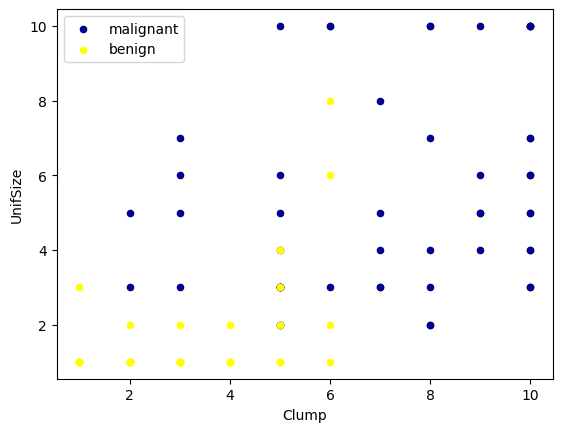

In [4]:
ax = cell_df[cell_df["Class"] == 4][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="DarkBlue", label="malignant");
cell_df[cell_df["Class"] == 2][0:50].plot(kind="scatter", x="Clump", y="UnifSize", color="Yellow", label="benign", ax=ax);
plt.show()

## پیش‌پردازش و انتخاب داده‌ها

ابتدا بیایید به انواع داده‌های ستون‌ها نگاه کنیم

In [5]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc          str
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

به نظر می‌رسد ستون **$BareNuc$** شامل برخی مقادیری است که عددی نیستند. می‌توانیم آن سطرها را حذف کنیم

In [6]:
cell_df = cell_df[pd.to_numeric(cell_df["BareNuc"], errors="coerce").notnull()]
cell_df["BareNuc"] = cell_df["BareNuc"].astype("int")
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [7]:
feature_df = cell_df[["Clump", "UnifSize", "UnifShape", "MargAdh", "SingEpiSize", "BareNuc", "BlandChrom", "NormNucl", "Mit"]]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

ما می‌خواهیم مدل مقدار $Class$ (یعنی خوش‌خیم (=2) یا بدخیم (=4)) را پیش‌بینی کند

از آنجایی که این فیلد فقط می‌تواند یکی از دو مقدار ممکن را داشته باشد، باید سطح اندازه‌گیری آن را برای انعکاس این موضوع تغییر دهیم

In [8]:
cell_df["Class"] = cell_df["Class"].astype("int")
y = np.asarray(cell_df["Class"])
y [0:5]

array([2, 2, 2, 2, 2])

## Train/Test dataset


ما مجموعه داده خود را به مجموعه آموزش و آزمون تقسیم می‌کنیم

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ("Train set:", X_train.shape,  y_train.shape)
print ("Test set:", X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>


الگوریتم $SVM$ یک انتخاب از توابع کرنل برای انجام پردازش خود ارائه می‌دهد

اساساً، نگاشت داده‌ها به یک فضای با ابعاد بالاتر را کرنلینگ می‌نامند

تابع ریاضی مورد استفاده برای تبدیل به عنوان تابع کرنل شناخته می‌شود و می‌تواند از انواع مختلفی باشد، مانند


* 1. خطی
* 2. چندجمله‌ای
* 3. تابع پایه شعاعی $(RBF)$
* 4. سیگموئید


هر یک از این توابع ویژگی‌های خاص خود، مزایا و معایب و معادله مخصوص به خود را دارد، اما از آنجایی که هیچ راه ساده‌ای برای دانستن این که کدام تابع با یک مجموعه داده خاص بهترین عملکرد را دارد وجود ندارد، معمولاً توابع مختلف را به نوبت انتخاب کرده و نتایج را مقایسه می‌کنیم

برای این آزمایشگاه فقط از تابع پیش‌فرض $RBF$ (تابع پایه شعاعی) استفاده می‌کنیم

In [10]:
from sklearn import svm
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train) 

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


پس از برازش، مدل می‌تواند برای پیش‌بینی مقادیر جدید استفاده شود

In [11]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

<h2 id="evaluation">Evaluation / ارزیابی</h2>


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


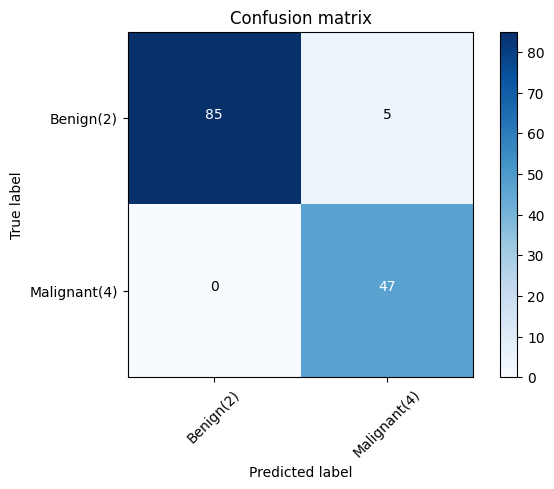

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Benign(2)","Malignant(4)"],normalize= False,  title="Confusion matrix")

شما همچنین می‌توانید به راحتی از $f_1\_score$ کتابخانه $sklearn$ استفاده کنید

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average="weighted") 

0.9639038982104676

بیایید شاخص $jaccard$ را برای دقت امتحان کنیم

In [16]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

<h2 id="practice">Practice</h2>


آیا می‌توانید مدل را مجدداً بسازید، اما این بار با کرنل $linear$ ؟

 شما می‌توانید از گزینه $kernel$ $=$ $"linear"$ هنگام تعریف $svm$ استفاده کنید
 
  دقت چگونه با تابع کرنل جدید تغییر می‌کند؟

In [17]:
# کد خود را اینجا بنویسید

<details><summary>برای مشاهده راه‌حل اینجا کلیک کنید</summary>

```python
clf2 = svm.SVC(kernel="linear")
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average="weighted"))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=2))

```

</details>



<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
